In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Part 1:

In [3]:
# B(z) measurement inside the coil at I = 1.00 A

B_z = np.array([
# z in cm, B in mT
    [0.0, 3.5],
    [0.5, 5.2],
    [1.0, 6.4],
    [1.5, 7.4],
    [2.0, 8.2],
    [2.5, 8.8],
    [3.0, 9.1],
    [3.5, 9.3],
    [4.0, 9.2],
    [4.5, 8.9],
    [5.0, 8.4],
    [5.5, 7.6],
    [6.0, 6.6],
    [6.5, 5.3],
    [7.0, 4.2]
]).T

B_err = 0.1 #mT


B_I = np.array([ # for z = 3.5 cm
#  I in A, B in mT
    [0.00,-0.5],
    [0.20, 1.3],
    [0.40, 3.3],
    [0.60, 5.3],
    [0.80, 7.3],
    [1.00, 9.3],
    [1.20, 11.3],
    [1.40, 13.3],
    [1.60, 15.2]
])

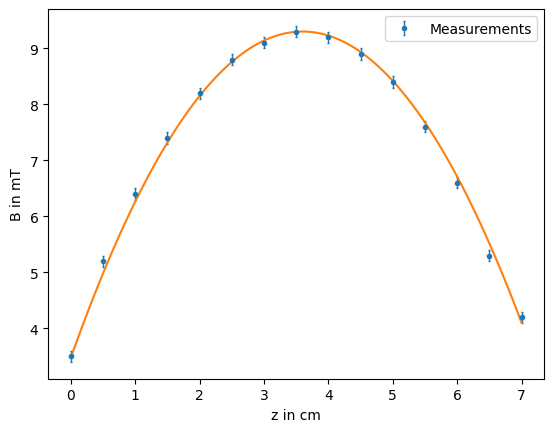

In [22]:
plt.errorbar(B_z[0],B_z[1],yerr=B_err, fmt='.', capsize=1, elinewidth=1, label='Measurements')# xerr=0.01, line_style='dashed' )
plt.ylabel('B in mT')
plt.xlabel('z in cm')
plt.legend()

# Manual fit:
x_fit = np.linspace(0,7,100)
def y_fit(x):
    return -0.45*(x-3.6)**2+9.3
plt.plot(x_fit,y_fit(x_fit))

In [44]:
import scipy.integrate as integrate

B_bar = integrate.quad(lambda x: y_fit(x),0,7)
print('B_bar = ',np.round(np.array(B_bar)[0]/7, decimals=2),'+-',0.1,'mT', )

B_bar =  7.46 +- 0.1 mT


In [43]:
B_alt = np.sum(B_z[1])/14
print(B_alt)

7.721428571428571
